## Synthetic Dataset Generation for reviews

In [45]:
from openai import OpenAI
import os
client = OpenAI(organization='*',
        project='*')
os.environ["OPENAI_API_KEY"] = "*"

### Using Langchain to Initialise GPT API and client

In [22]:
import openai
from langchain_openai import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationSummaryBufferMemory

chat = ChatOpenAI(
    model="gpt-4o",
    temperature=0.7,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)
conversation = ConversationChain(
    llm=chat,
    memory=ConversationSummaryBufferMemory(
        llm=chat, max_token_limit=50000
    ),
    verbose=False,
)

zero_shot_system_prompt = conversation.predict(input="You are a product reviewer. You need to have delicate emotions, unique perspectives, and a distinctive style imitating humans. You are going to write a highly polar review for a product listed on an e-commerce website. You are given a product category and a length requirement. You must come up with a product to the category and write a review that meets the length requirement.The Response should be in csv format.")

### The First Method to Generate a Synthetic Data is to use a zero-shot prompting technique with 3 level of prompting for better results:
1. The first level of prompting Used here is Context Prompt. It defines the behaviour and role of the LLM
2. The second level of prompting used is Data Generation Prompt that generates our required dataset.
3. The third level of prompting used is Diversifying Prompt that brings in more diversification in the generated review content.
With these level of prompting we can ensure a diverse and human like dataset for product reviews.

In [23]:
zero_shot_system_prompt

'I\'m excited to dive into the world of product reviews! Let\'s get started. Below is a review in CSV format for a product in the "smartphone" category. The review is designed to be highly polar, showcasing both high praise and critical feedback.\n\n```\n"Category","Product Name","Review"\n"Smartphone","TechNova X1000","The TechNova X1000 is a marvel of modern engineering, a smartphone that truly stands out in the crowded market. Its design is sleek and elegant, with a seamless glass finish that feels luxurious to the touch. The display is nothing short of breathtaking, offering vibrant colors and crisp clarity that make every image and video pop. Battery life is exceptional, lasting well beyond a full day even with heavy usage. However, the software experience is where things take a nosedive. The interface is cluttered, with pre-installed apps that cannot be removed, creating a frustrating user experience. Updates are sporadic, leaving the phone vulnerable to security issues. Customer

In [24]:
zero_shot_response = conversation.predict(input = "Write a product review for a supplements/vitamins product to express pos_or_neg feedback. Each review should have less than 50 words. Be sure to express your personal insights and feelings. Please be creative and write unique product reviews. Give review of 50 such products")

In [25]:
zero_shot_response

'Sure, here\'s a CSV format with reviews for 50 different supplements/vitamins products, each with a unique perspective and less than 50 words:\n\n```\n"Category","Product Name","Review"\n"Supplements","Vitality Boost Multivitamin","Vitality Boost feels like a morning hug! It energizes my day, but the taste is a bit chalky."\n"Supplements","Omega-3 Fish Oil","Heart feels healthier with Omega-3 Fish Oil, but the fishy aftertaste lingers longer than I\'d like."\n"Vitamins","Sunshine Vitamin D3","Sunshine in a bottle! My mood uplifted, but the capsules are a bit large to swallow."\n"Supplements","Herbal Calm","Herbal Calm soothes my stress effectively, though it occasionally makes me drowsy."\n"Vitamins","B-Complex Energy Blend","B-Complex truly boosts my energy, but the smell is quite off-putting."\n"Supplements","Probiotic Harmony","Gut feels great with Probiotic Harmony, but refrigeration is a hassle."\n"Vitamins","Calcium Citrate","Calcium Citrate strengthens my bones, but the tablet 

In [26]:
zero_shot_diverse = conversation.predict(input = "Can you provide something more diverse compared to the previously generated data?")

In [27]:
zero_shot_diverse

'Certainly! Below is a more diverse set of product reviews for supplements and vitamins, each with its own unique perspective and less than 50 words:\n\n```\n"Category","Product Name","Review"\n"Supplements","Maca Root Energy","Maca Root gives me a natural energy boost, but the earthy taste isn\'t for everyone."\n"Vitamins","Cranberry Extract","Cranberry Extract keeps my urinary tract happy, though the capsules are quite large."\n"Supplements","L-Arginine Performance","L-Arginine enhances my workout performance, but consistent use is necessary."\n"Vitamins","Selenium Immune Support","Selenium strengthens my immunity, yet the pill size is a bit daunting."\n"Supplements","Reishi Mushroom Calm","Reishi Mushroom calms my nerves, though the taste is quite strong."\n"Vitamins","Vitamin H (Biotin)","Vitamin H makes my nails stronger, but the results aren\'t immediate."\n"Supplements","Cordyceps Vitality","Cordyceps boosts my stamina, but takes time to notice effects."\n"Vitamins","Vitamin B5 

### The Second Method to Generate a Synthetic Data is to use a Few-shot prompting technique with 4 level of prompting for better results

1. The first level of prompting Used here is Context Prompt. It defines the behaviour and role of the LLM and also gives a sample of real world data to make the LLM familiar with it and make it capable of obtaining more real like dataset.

2. The second level of prompting used is Constraint Prompt that restricts the LLM from just copying and modifying provided example.

3. The third level of prompting used is Data Generation Prompt that generates the required data.

4. The fourth level of prompting used is Diversifying Prompt that brings in more diversification in the generated reviews.

In [43]:
conversation_fewshot = ConversationChain(
    llm=chat,
    memory=ConversationSummaryBufferMemory(
        llm=chat, max_token_limit=50000
    ),
    verbose=False,
)

In [48]:
#we are reading a sample set of amazon review dataset to augment it with the prompts
import pandas as pd
sample_data = pd.read_excel("C://Users/SAGAR/Desktop/sample-data.xlsx")
sample_data_string = sample_data.to_string()

In [47]:
sample_data.head()

,title,category,Review
0,MAXX LIVE L-Methylfolate 7.5mg Active Folate 5...,'Heart Health Event'],Glad I found this. Works great for my depressi...
1,Cellular Gold 1 oz.,'Heart Health Event'],i almost hate to share a wonderful review lest...
2,Thorne Undecylenic Acid - 250 mg of Undecyleni...,'Heart Health Event'],I am using this for Candida along with three-l...
3,"BIOTIN 10,000 mcg Maximum Strength Tablets, 10...",'Heart Health Event'],"It is a very good produce, I have been using B..."
4,Atlantic Laboratories (5-MTHF) L-Methylfolate ...,'Heart Health Event'],This Capsules are so small!! I thought I didnt...


In [37]:
sample_data_string

"                                                                                                                                                                                                   title                      category                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [54]:
import openai
from langchain_openai import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationSummaryBufferMemory

chat = ChatOpenAI(
    model="gpt-4o",
    temperature=0.7,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)
conversation_fewshot = ConversationChain(
    llm=chat,
    memory=ConversationSummaryBufferMemory(
        llm=chat, max_token_limit=50000
    ),
    verbose=False,
)

few_shot_system_prompt = conversation_fewshot.predict(input="You are a product reviewer. You need to have delicate emotions, unique perspectives, and a distinctive style imitating humans. You are going to write a highly polar review for a product listed on an e-commerce website. You are given a product category and a length requirement. You must come up with a product to the category and write a review that meets the length requirement.The Response should be in csv format.Below are some samples for the product and its review, you should imitate the examples I have provided but you cannot simply modify or rewrite the example I have given, you should imitate the example I have provided but you cannot simply modify or rewrite the example I have given:" + sample_data_string)

In [55]:
few_shot_system_prompt

'```csv\ntitle,category,Review\n"EcoBreeze Reusable Bamboo Paper Towels","Eco-Friendly Products","In a world drowning in waste, the EcoBreeze Reusable Bamboo Paper Towels are a breath of fresh air, quite literally. These towels are a sustainable alternative to the traditional paper towel, crafted from organic bamboo fibers that are not only biodegradable but surprisingly durable. Each roll comes with 20 sheets that can be washed and reused up to 100 times, making them an economical and environmentally friendly choice. They absorb spills effortlessly, leaving surfaces immaculate without the guilt of contributing to deforestation. However, their texture might feel a bit rough for those accustomed to the softness of conventional paper towels. Despite this minor setback, their eco-friendly credentials make them a must-have for the green-conscious household."\n```'

In [56]:
few_shot_response = conversation.predict(input = "Write a product review for a multiple product category to express pos_or_neg feedback. Each review should have less than 50 words. Be sure to express your personal insights and feelings. Please be creative and write unique product reviews. Give review of 50 such products")

In [57]:
few_shot_response

'Certainly! Here\'s a diverse set of product reviews across multiple categories, each with unique perspectives and less than 50 words:\n\n```\n"Category","Product Name","Review"\n"Electronics","SoundWave Bluetooth Speaker","SoundWave delivers crisp sound and deep bass, but the battery life disappoints."\n"Kitchen","Gourmet Chef Knife","Gourmet Chef Knife slices effortlessly, though the handle is uncomfortable."\n"Beauty","SilkSmooth Hair Straightener","SilkSmooth straightens hair beautifully, yet takes too long to heat up."\n"Fitness","FlexPro Resistance Bands","FlexPro Bands are versatile for workouts, but they lose elasticity quickly."\n"Home","CozyCloud Memory Foam Pillow","CozyCloud cradles my head perfectly, but retains too much heat."\n"Fashion","UrbanChic Denim Jacket","UrbanChic Jacket is stylish and versatile, though the material feels stiff."\n"Garden","GreenThumb Plant Fertilizer","GreenThumb enhances my plants\' growth, but is a bit pricey."\n"Office","ErgoEase Desk Chair",

In [59]:
few_shot_diverse = conversation.predict(input = "Can you provide something more diverse compared to the previously generated data?")

In [60]:
few_shot_diverse

'Of course! Here\'s a more diverse set of product reviews across multiple categories, each offering a unique perspective and less than 50 words:\n\n```\n"Category","Product Name","Review"\n"Electronics","EcoSound Wireless Earbuds","EcoSound offers impressive noise cancellation, but the touch controls are finicky."\n"Kitchen","SwiftChop Mandoline Slicer","SwiftChop slices veggies with precision, though cleaning is a hassle."\n"Beauty","FreshFace Cleansing Brush","FreshFace leaves my skin refreshed, yet the bristles wear out quickly."\n"Fitness","ZenFlex Yoga Wheel","ZenFlex enhances my stretching routine, but it\'s not beginner-friendly."\n"Home","Lumina Smart Bulb","Lumina adjusts lighting beautifully, though the app is glitchy."\n"Fashion","BoldStripe Silk Scarf","BoldStripe adds flair to outfits, yet the fabric snags easily."\n"Garden","EcoGrow Compost Bin","EcoGrow turns waste into riches, but assembling it is tricky."\n"Office","ProOrganize Desk Organizer","ProOrganize tidies my wo

### To write the Datset into CSV file, GPT API has been invoked to generate a code to write the corresponding data into a csv file and then the code is executed to obtain the dataset file

### Performing EDA to Check the Diversity of a dataset

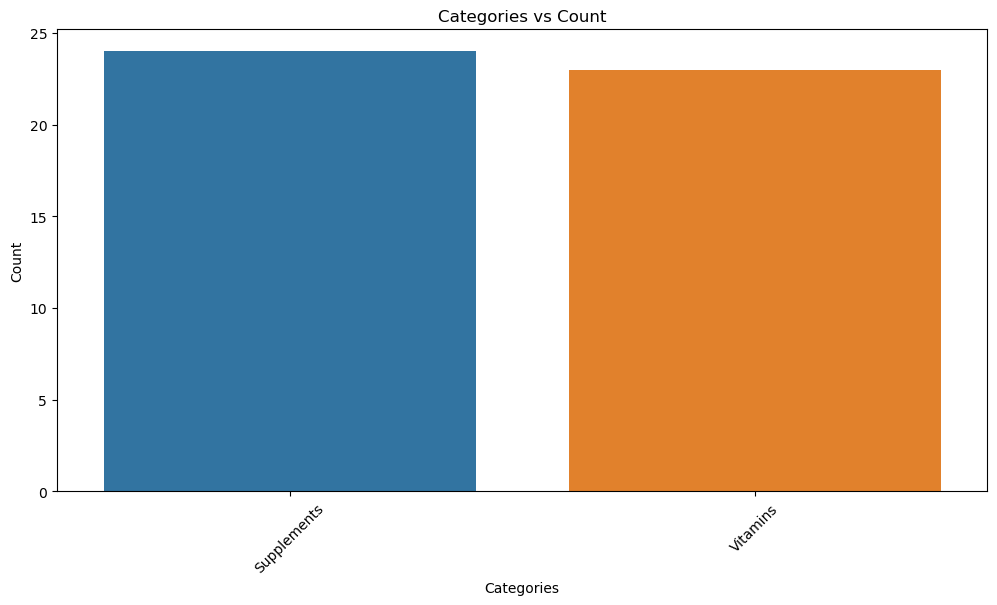

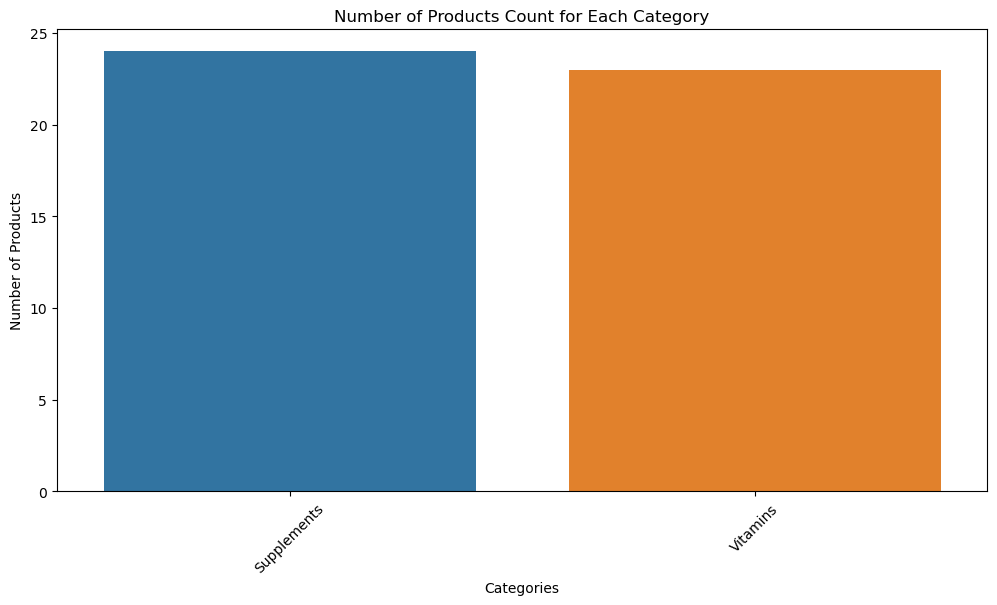

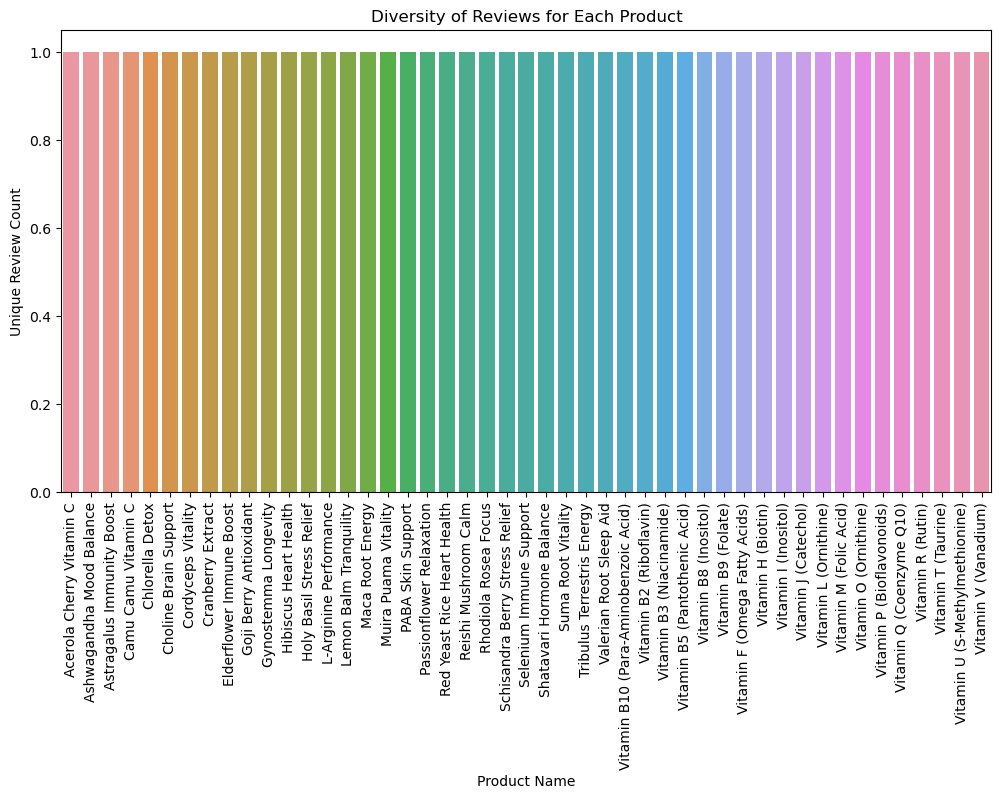

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('zero_shot_diverse_product_reviews.csv')

#Categories vs Count
plt.figure(figsize=(12, 6))
category_counts = df['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Categories vs Count')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Number of Products Count for Each Category
plt.figure(figsize=(12, 6))
product_counts = df.groupby('Category')['Product Name'].nunique().reset_index()
sns.barplot(x=product_counts['Category'], y=product_counts['Product Name'])
plt.title('Number of Products Count for Each Category')
plt.xlabel('Categories')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


#Diversity of the Review Column for Each Product
review_diversity = df.groupby('Product Name')['Review'].nunique().reset_index()
review_diversity.columns = ['Product Name', 'unique_review_count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Product Name', y='unique_review_count', data=review_diversity)
plt.title('Diversity of Reviews for Each Product')
plt.xlabel('Product Name')
plt.ylabel('Unique Review Count')
plt.xticks(rotation=90)
plt.show()

DataFrame columns: Index(['Category', 'Product Name', 'Review'], dtype='object')
      Category             Product Name  \
0  Supplements         Maca Root Energy   
1     Vitamins        Cranberry Extract   
2  Supplements   L-Arginine Performance   
3     Vitamins  Selenium Immune Support   
4  Supplements     Reishi Mushroom Calm   

                                              Review  
0  Maca Root gives me a natural energy boost, but...  
1  Cranberry Extract keeps my urinary tract happy...  
2  L-Arginine enhances my workout performance, bu...  
3  Selenium strengthens my immunity, yet the pill...  
4  Reishi Mushroom calms my nerves, though the ta...  


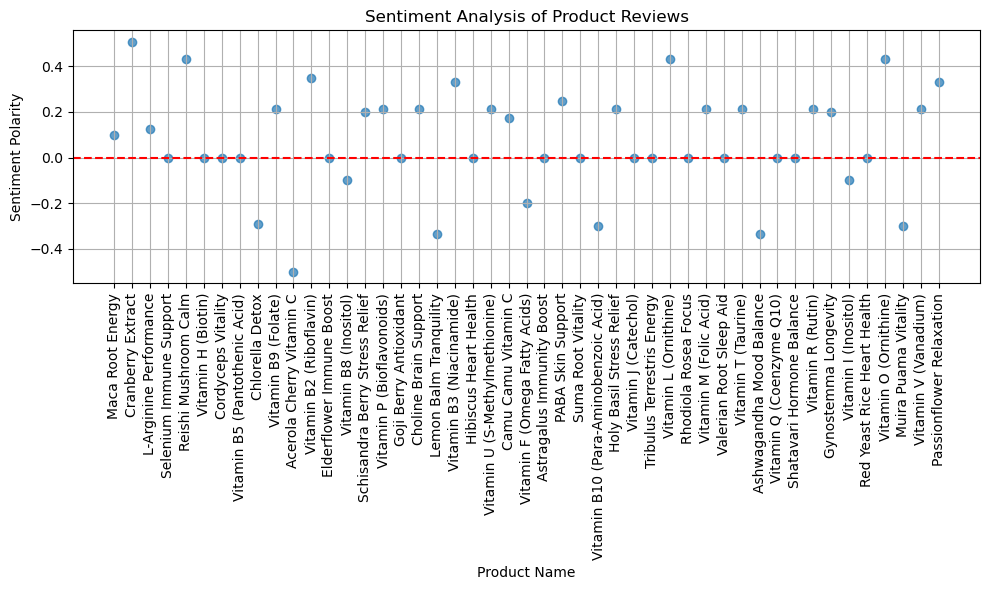

In [73]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(review):
    return TextBlob(review).sentiment.polarity

# Apply the sentiment analysis to the review column
df['Sentiment'] = df['Review'].apply(get_sentiment)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Product Name'], data['Sentiment'], alpha=0.7)
plt.xticks(rotation=90)
plt.title('Sentiment Analysis of Product Reviews')
plt.xlabel('Product Name')
plt.ylabel('Sentiment Polarity')
plt.axhline(0, color='red', linestyle='--')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

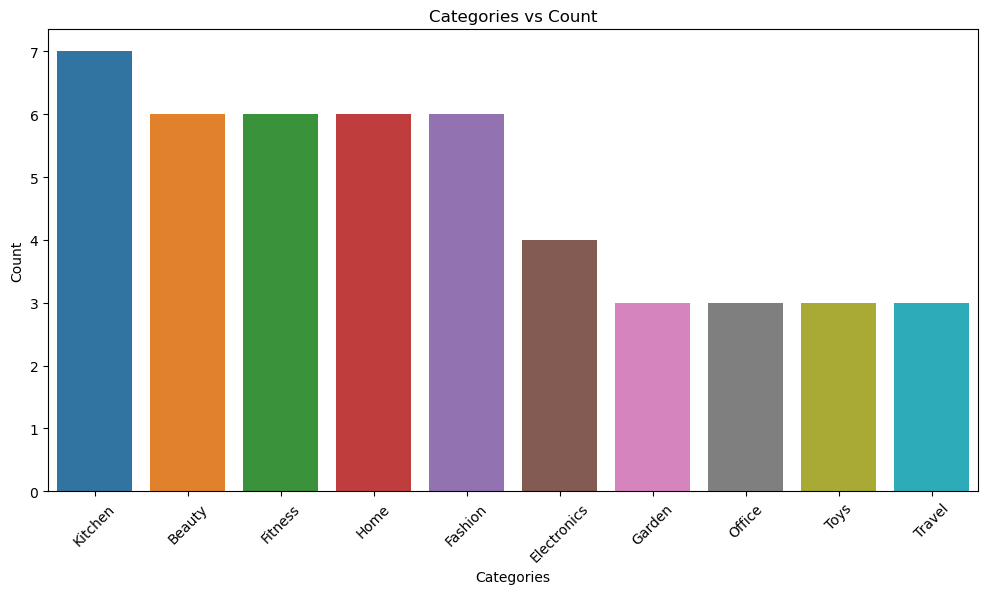

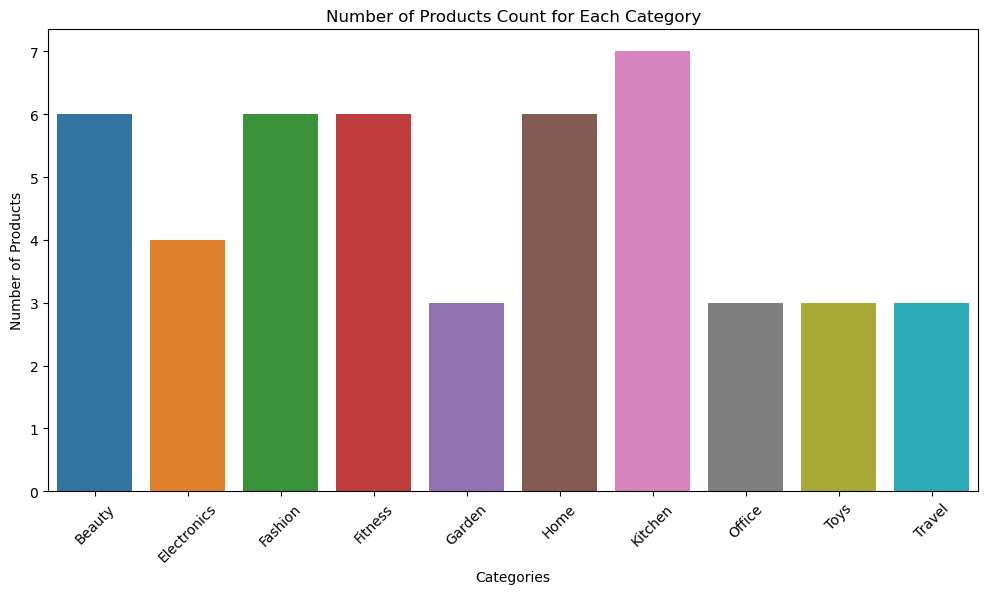

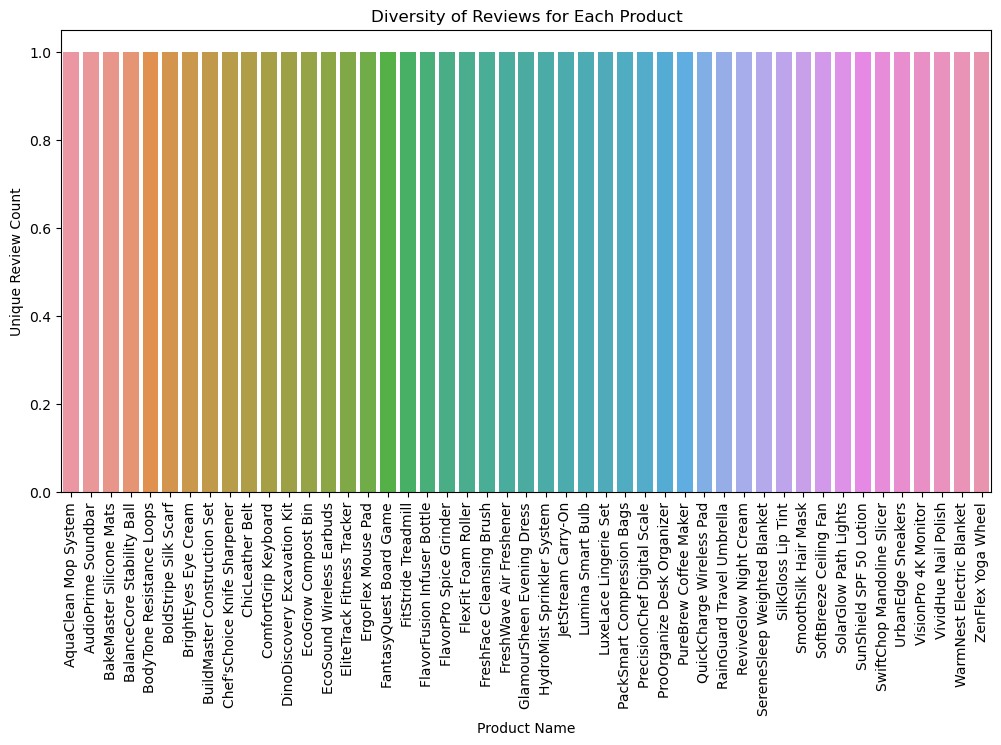

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('fewshot_product_reviews_diverse.csv')

#Categories vs Count
plt.figure(figsize=(12, 6))
category_counts = df['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Categories vs Count')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Number of Products Count for Each Category
plt.figure(figsize=(12, 6))
product_counts = df.groupby('Category')['Product Name'].nunique().reset_index()
sns.barplot(x=product_counts['Category'], y=product_counts['Product Name'])
plt.title('Number of Products Count for Each Category')
plt.xlabel('Categories')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


#Diversity of the Review Column for Each Product
review_diversity = df.groupby('Product Name')['Review'].nunique().reset_index()
review_diversity.columns = ['Product Name', 'unique_review_count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Product Name', y='unique_review_count', data=review_diversity)
plt.title('Diversity of Reviews for Each Product')
plt.xlabel('Product Name')
plt.ylabel('Unique Review Count')
plt.xticks(rotation=90)
plt.show()

DataFrame columns: Index(['Category', 'Product Name', 'Review'], dtype='object')
      Category                Product Name  \
0  Electronics   EcoSound Wireless Earbuds   
1      Kitchen  SwiftChop Mandoline Slicer   
2       Beauty   FreshFace Cleansing Brush   
3      Fitness          ZenFlex Yoga Wheel   
4         Home           Lumina Smart Bulb   

                                              Review  
0  EcoSound offers impressive noise cancellation,...  
1  SwiftChop slices veggies with precision, thoug...  
2  FreshFace leaves my skin refreshed, yet the br...  
3  ZenFlex enhances my stretching routine, but it...  
4  Lumina adjusts lighting beautifully, though th...  


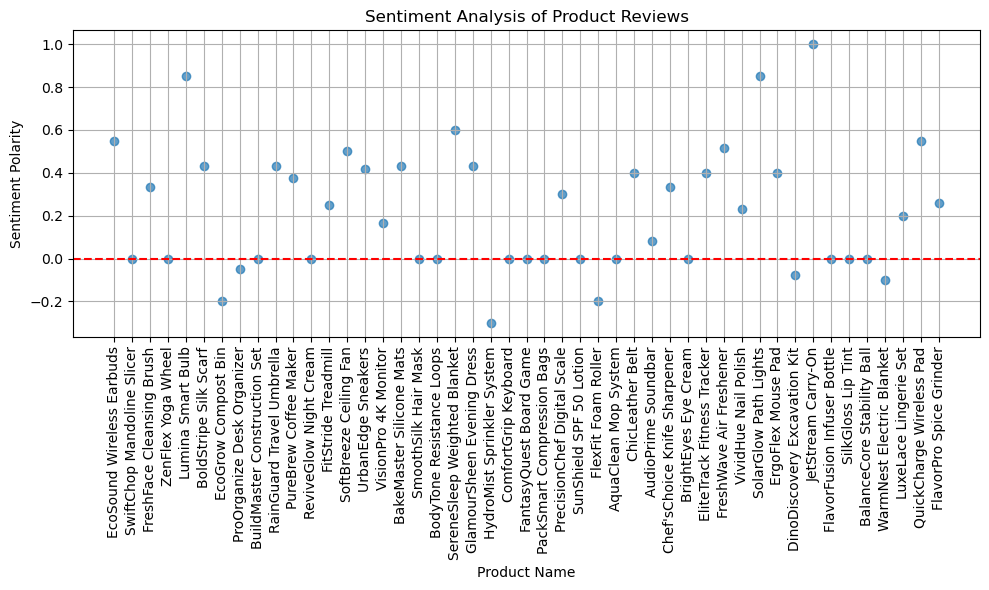

In [74]:
# Apply the sentiment analysis to the review column
df['Sentiment'] = df['Review'].apply(get_sentiment)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Product Name'], data['Sentiment'], alpha=0.7)
plt.xticks(rotation=90)
plt.title('Sentiment Analysis of Product Reviews')
plt.xlabel('Product Name')
plt.ylabel('Sentiment Polarity')
plt.axhline(0, color='red', linestyle='--')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

### computing the Remote CLique Score and Chamfer distance score to check diversity (Higher the Score means higher diversity)

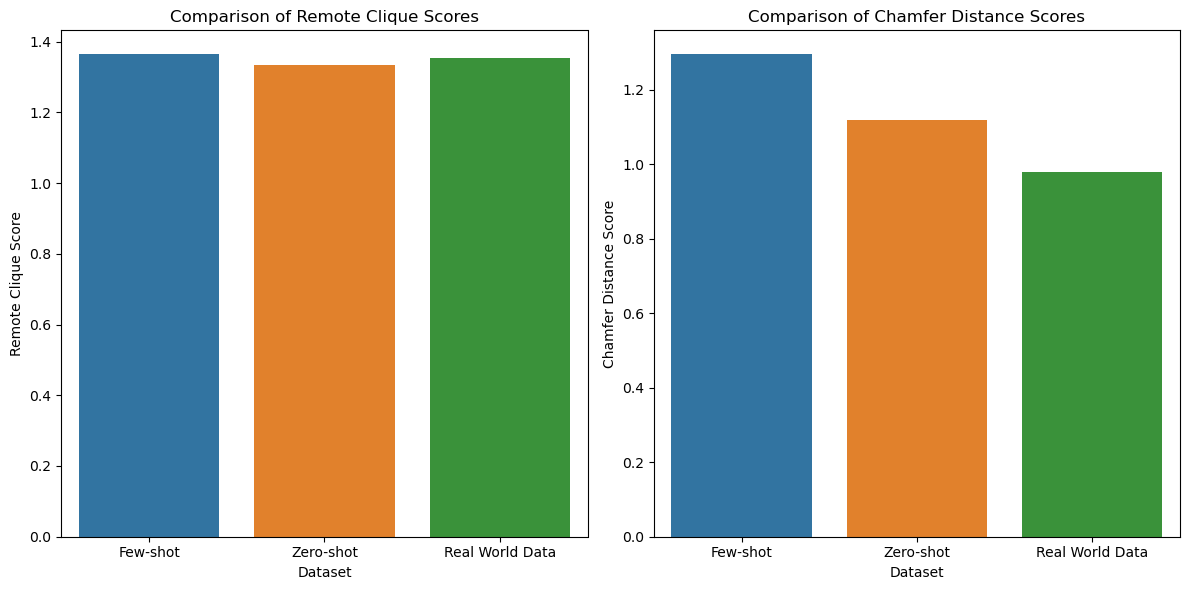

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cdist

#Function to calculate Remote Clique Score
def remote_clique_score(data):
    distances = cdist(data, data, metric='euclidean') 
    mean_distances = np.mean(distances, axis=1)
    return np.mean(mean_distances) 

#Function to calculate Chamfer Distance Score
def chamfer_distance_score(data):
    distances = cdist(data, data, metric='euclidean')
    min_distances = np.min(distances + np.eye(distances.shape[0]) * np.max(distances), axis=1)
    return np.mean(min_distances)

#Function to process each dataset and compute scores
def process_dataset(file_path, dataset_name):
    # Load the dataset
    df = pd.read_csv(file_path, encoding='ISO-8859-1')  
    
    # Handle missing reviews by dropping null values
    df = df.dropna()
    
    reviews = df['Review'].values
    
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(reviews).toarray()
    
    # Calculate the scores
    remote_score = remote_clique_score(tfidf_matrix)
    chamfer_score = chamfer_distance_score(tfidf_matrix)
    
    return {'dataset': dataset_name, 'remote_score': remote_score, 'chamfer_score': chamfer_score}

#List of datasets to process
datasets = [
    {'file': 'fewshot_product_reviews_diverse.csv', 'name': 'Few-shot'},
    {'file': 'zero_shot_diverse_product_reviews.csv', 'name': 'Zero-shot'},
    {'file': 'real_reviews.csv', 'name': 'Real World Data'}
]

#Process each dataset and store the results
results = []
for dataset in datasets:
    scores = process_dataset(dataset['file'], dataset['name'])
    results.append(scores)

results_df = pd.DataFrame(results)

#Plot the comparison of Remote Clique Score and Chamfer Distance Score
plt.figure(figsize=(12, 6))

# Plot Remote Clique Score
plt.subplot(1, 2, 1)
sns.barplot(x='dataset', y='remote_score', data=results_df)
plt.title('Comparison of Remote Clique Scores')
plt.xlabel('Dataset')
plt.ylabel('Remote Clique Score')

# Plot Chamfer Distance Score
plt.subplot(1, 2, 2)
sns.barplot(x='dataset', y='chamfer_score', data=results_df)
plt.title('Comparison of Chamfer Distance Scores')
plt.xlabel('Dataset')
plt.ylabel('Chamfer Distance Score')

plt.tight_layout()
plt.show()